# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
sns.set()

# Loading the model predictions

In [2]:
models = ['MVLR', 'DNN', 'LSTM', 'GRU', 'CNN', 'Timedistributed'] # specify the model names

dfs = []
for model in models:
    df = pd.read_csv('models\\'+model+'_1H_predictions.csv', parse_dates=['datetime'])
    df = df.set_index(['datetime']) 
    df.columns = ['y_pred_'+model, 'y_true_'+model] # change columns to contain the model name
    dfs.append(df)

df = pd.concat(dfs) # Concatenate the list of DataFrames together to one DataFrame

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


# Processing the predictions

In [3]:
df.head()

,y_pred_CNN,y_pred_DNN,y_pred_GRU,y_pred_LSTM,y_pred_MVLR,y_pred_Timedistributed,y_true_CNN,y_true_DNN,y_true_GRU,y_true_LSTM,y_true_MVLR,y_true_Timedistributed
datetime,,,,,,,,,,,,
2017-09-11 10:00:00,NaN,NaN,NaN,NaN,0.809568,NaN,NaN,NaN,NaN,NaN,0.392012,NaN
2017-09-11 11:00:00,NaN,NaN,NaN,NaN,0.668943,NaN,NaN,NaN,NaN,NaN,0.340798,NaN
2017-09-11 12:00:00,NaN,NaN,NaN,NaN,0.579100,NaN,NaN,NaN,NaN,NaN,0.301736,NaN
2017-09-11 13:00:00,NaN,NaN,NaN,NaN,0.477537,NaN,NaN,NaN,NaN,NaN,0.403931,NaN
2017-09-11 14:00:00,NaN,NaN,NaN,NaN,0.352537,NaN,NaN,NaN,NaN,NaN,0.228943,NaN


In [4]:
# Calculate the difference between the y_true and y_pred per model
for model in models:
    df['y_diff_'+model] = df['y_true_'+model] - df['y_pred_'+model]
    df['y_diff_perc_'+model] = df['y_diff_'+model] / df['y_true_'+model] * 100
 
df.head()

,y_pred_CNN,y_pred_DNN,y_pred_GRU,y_pred_LSTM,y_pred_MVLR,y_pred_Timedistributed,y_true_CNN,y_true_DNN,y_true_GRU,y_true_LSTM,...,y_diff_DNN,y_diff_perc_DNN,y_diff_LSTM,y_diff_perc_LSTM,y_diff_GRU,y_diff_perc_GRU,y_diff_CNN,y_diff_perc_CNN,y_diff_Timedistributed,y_diff_perc_Timedistributed
datetime,,,,,,,,,,,,,,,,,,,,,
2017-09-11 10:00:00,NaN,NaN,NaN,NaN,0.809568,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11 11:00:00,NaN,NaN,NaN,NaN,0.668943,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11 12:00:00,NaN,NaN,NaN,NaN,0.579100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11 13:00:00,NaN,NaN,NaN,NaN,0.477537,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11 14:00:00,NaN,NaN,NaN,NaN,0.352537,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plotting the predictions
Defining the plot functions

In [5]:
def plot_predictions(df, resolution, savefig):
    df = df.resample(resolution).sum()
    
    magnitude = 1

    #model = 'DNN'

    y_true = df['y_true_DNN']

    plt.figure(figsize=(20,10))

    # TODO: Fix this
    #df['zeros'] = 0
    #plt.fill_between(y_true.index, y_true, df['zeros'], '.-', color='red')

    colors = ['lightcoral', 'olivedrab', 'royalblue', 'mediumvioletred', 'black', 'hotpink']
    markers = ['v', '*', 's', 'p', '^', '.']

    for i, model in enumerate(models):
        color = colors[i]
        marker = markers[i]
        y_pred = df['y_pred_'+model]
        plt.plot(y_pred.index, y_pred, marker+'-', color=color, label=(model+' predictions'), alpha=1, markersize=9)


    plt.plot(y_true.index, y_true, '.-.', color='firebrick', label='True values', alpha=1, linewidth=3, markersize=15, fillstyle='none')

    plt.ylabel(r'gasPower $\cdot$ 10$^{-%s}$ [m$^3$/h]' % magnitude, fontsize=14)
    plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates

    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

    plt.title('Model results with a resolution of '+resolution, fontsize=14)

    plt.tight_layout()

    plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=1)
    
    if savefig:
        plt.savefig(resolution+'_predictions.png', dpi=1300)

In [6]:
def plot_predictions_difference(df, resolution, savefig):
    df = df.resample(resolution).sum()
    
    magnitude = 1

    #model = 'DNN'

    y_true = df['y_true_DNN']

    plt.figure(figsize=(20,10))

    # TODO: Fix this
    #df['zeros'] = 0
    #plt.fill_between(y_true.index, y_true, df['zeros'], '.-', color='red')

    colors = ['lightcoral', 'olivedrab', 'royalblue', 'mediumvioletred', 'black', 'hotpink']
    markers = ['v', '*', 's', 'p', '^', '.']

    for i, model in enumerate(models):
        color = colors[i]
        marker = markers[i]
        y_pred = df['y_diff_'+model]
        plt.plot(y_pred.index, y_pred, marker+'-', color=color, label=(model+' predictions'), alpha=1, markersize=9)


    #plt.plot(y_true.index, y_true, '.-.', color='firebrick', label='True values', alpha=1, linewidth=3, markersize=15, fillstyle='none')

    plt.ylabel(r'|$\hat{Y}$ - $Y$| $\cdot$ 10$^{-%s}$ [m$^3$/h]' % magnitude, fontsize=14)
    plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates

    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

    plt.title('Model results with a resolution of '+resolution, fontsize=14)

    plt.tight_layout()

    plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=1)
    
    if savefig:
        plt.savefig(resolution+'_predictions_difference.png', dpi=1300)

# One hour resolution predictions

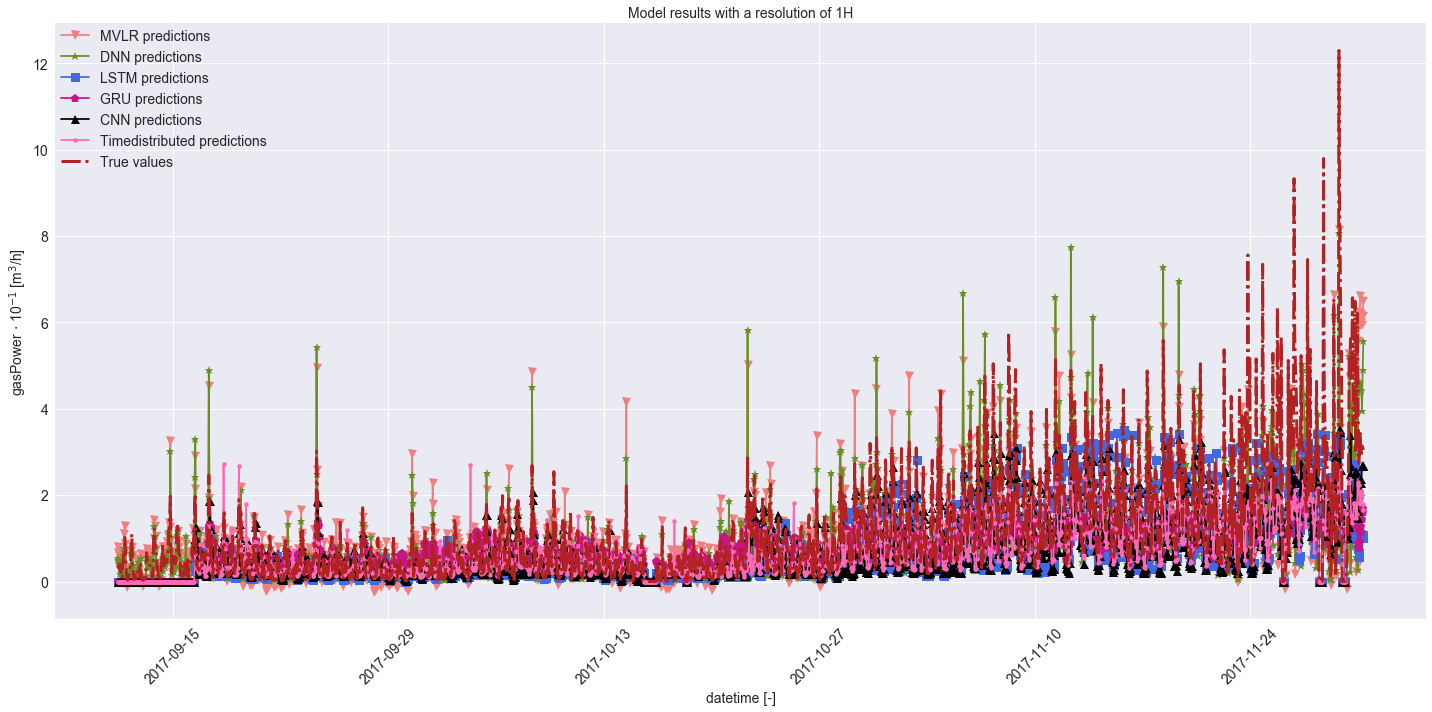

In [7]:
plot_predictions(df, '1H', savefig=False)

# One day resolution predictions

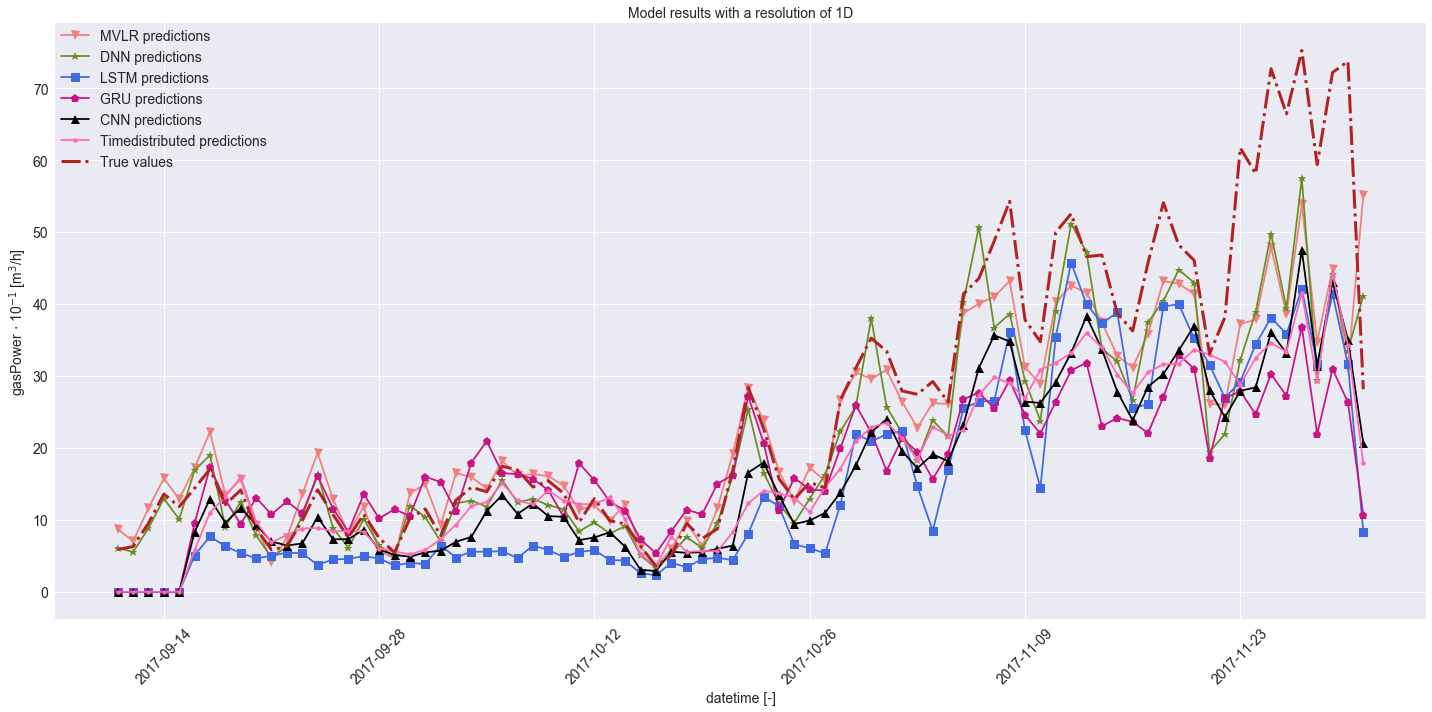

In [8]:
plot_predictions(df, '1D', savefig=True)

# One week resolution predictions

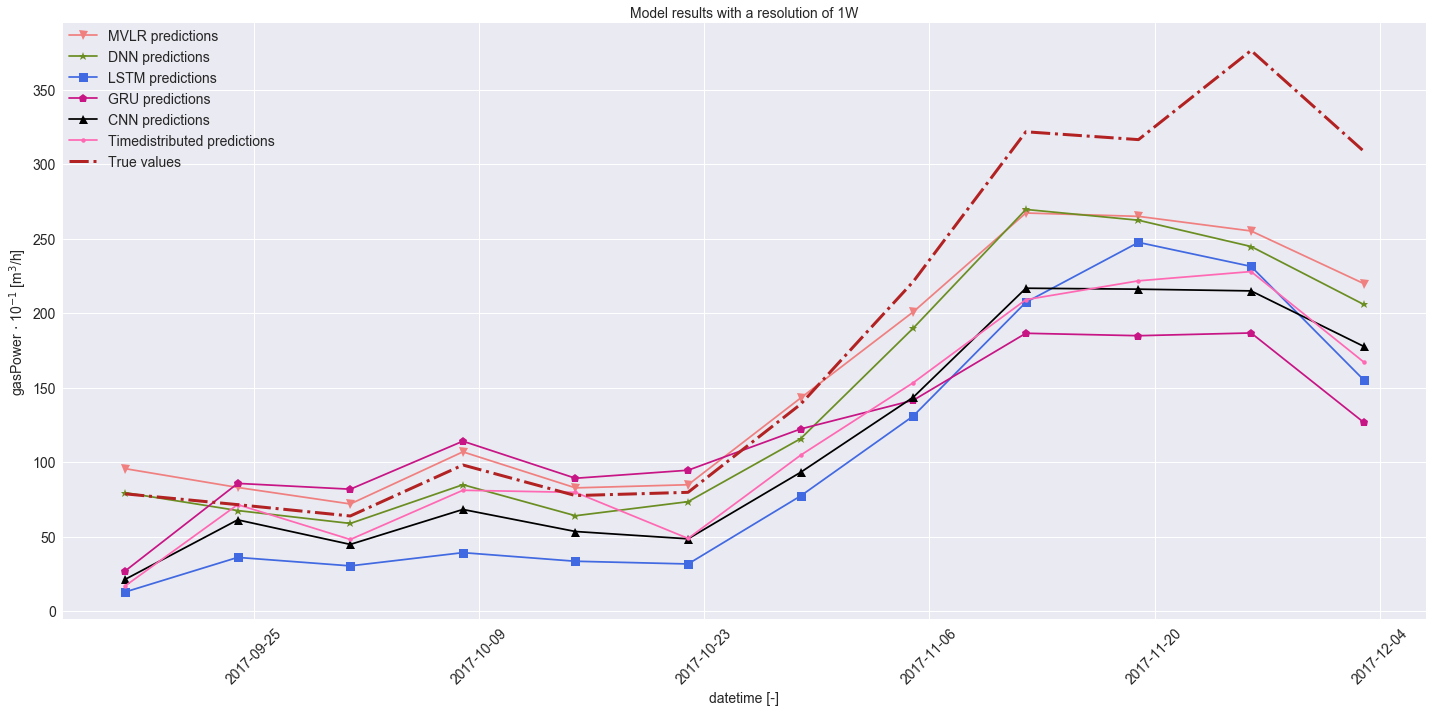

In [9]:
plot_predictions(df, '1W', savefig=True)

# Four weeks resolution predictions

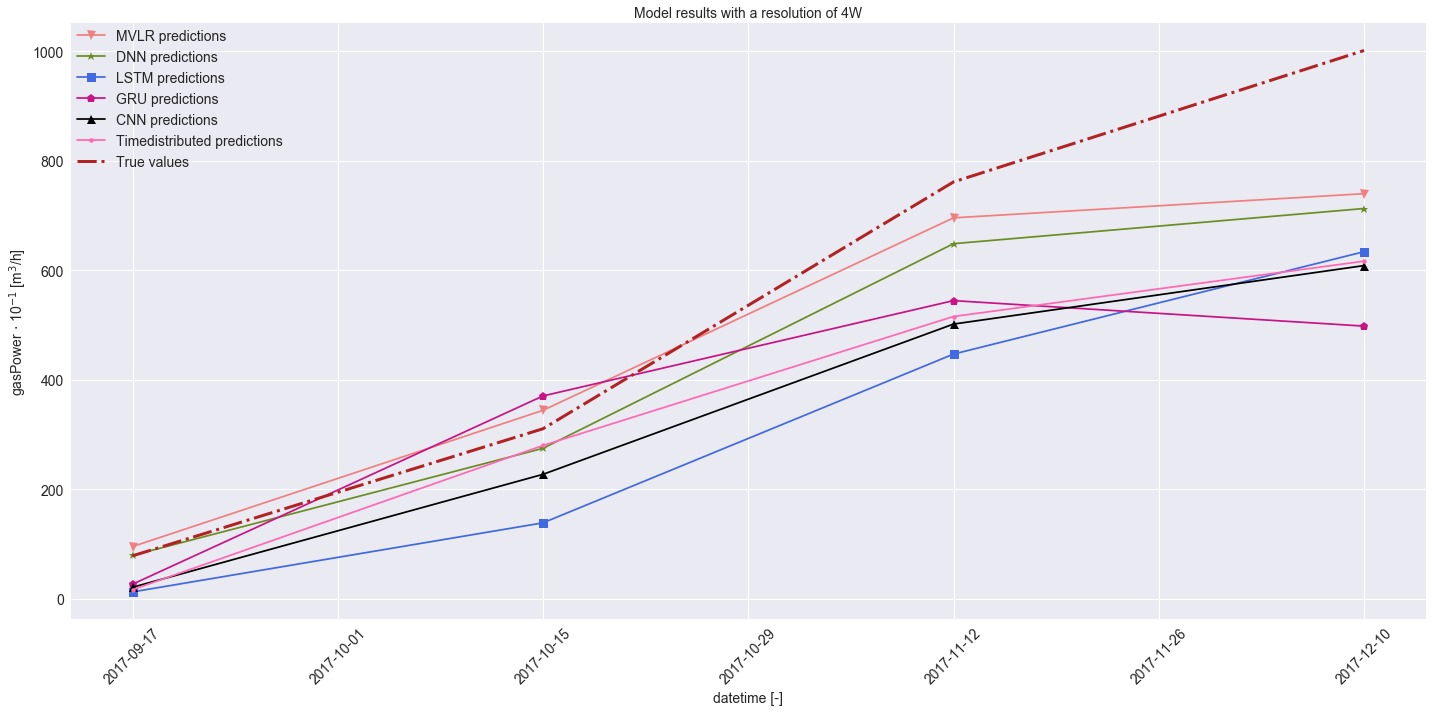

In [10]:
plot_predictions(df, '4W', savefig=False)

# ----- Difference between y_true and y_pred -----
Having the y-axis value closer to zero is better.

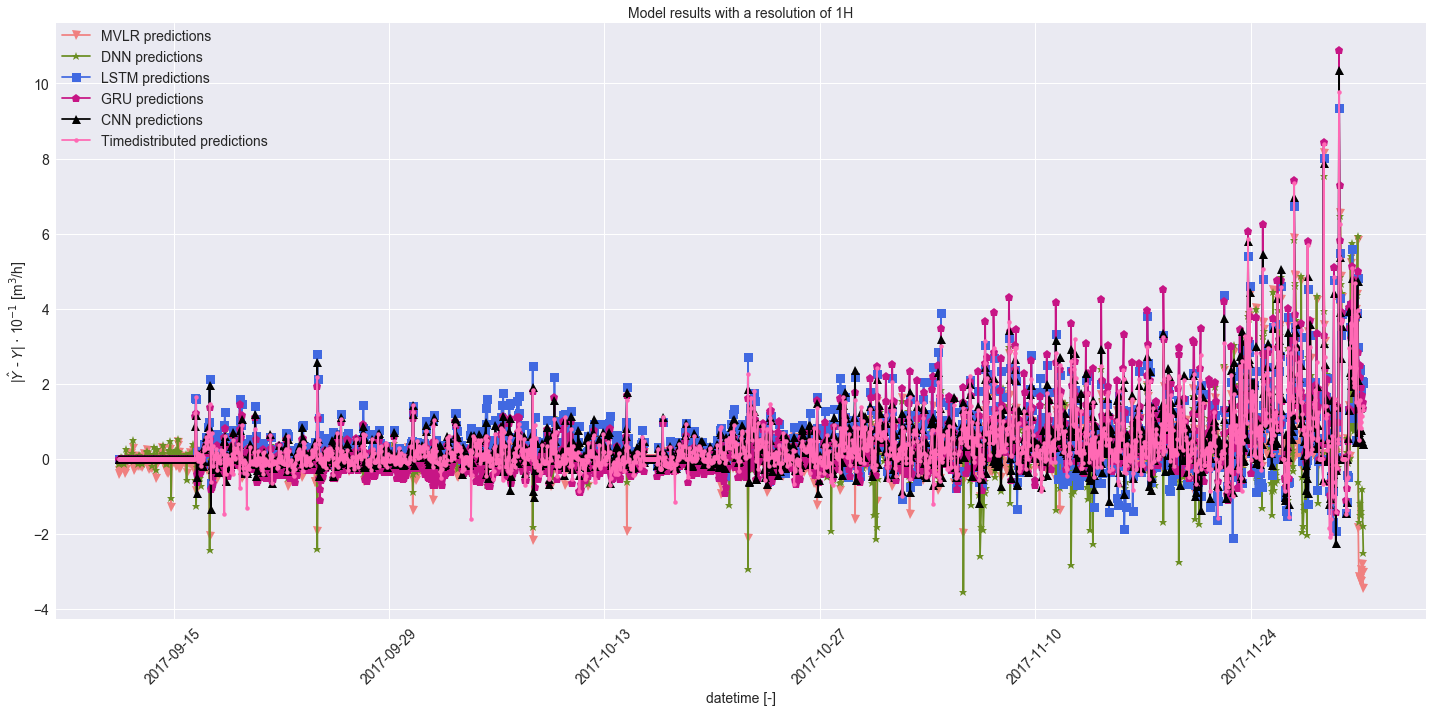

In [11]:
plot_predictions_difference(df, '1H', savefig=False)

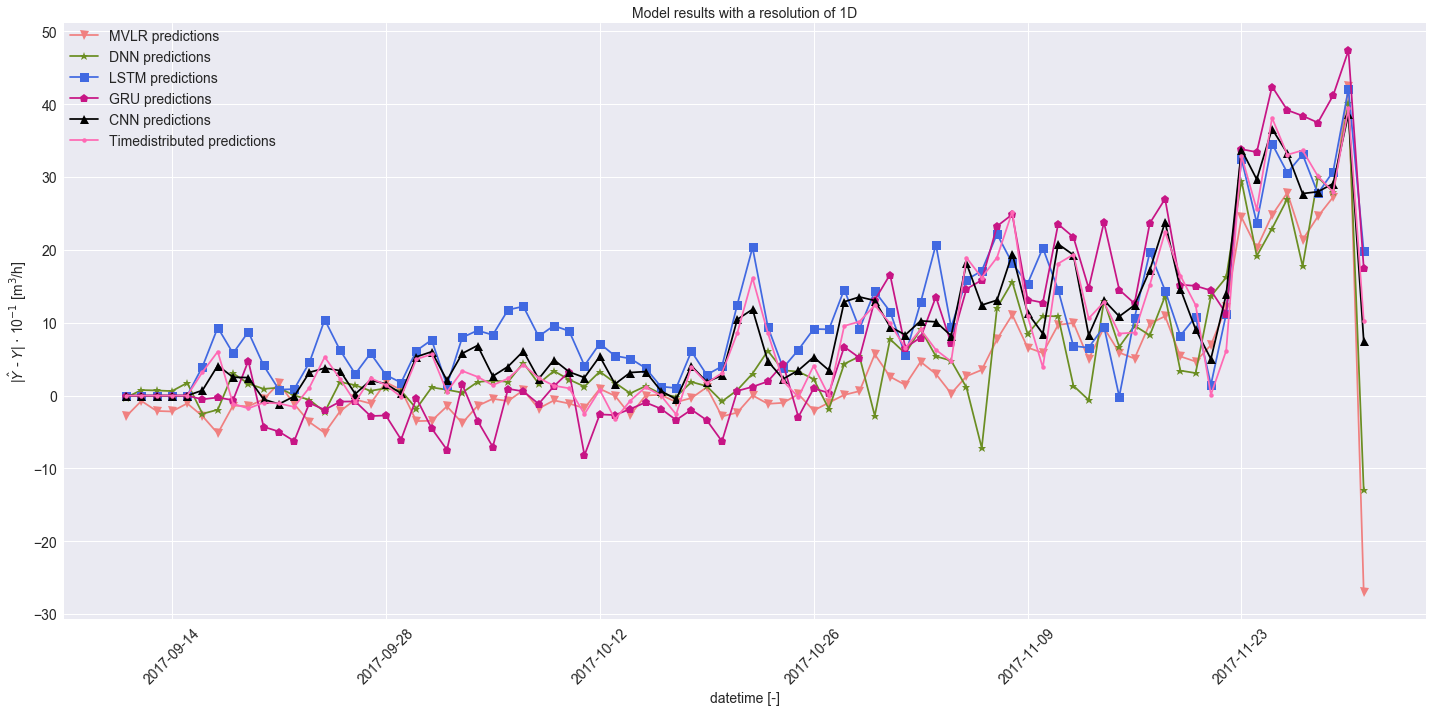

In [12]:
plot_predictions_difference(df, '1D', savefig=False)

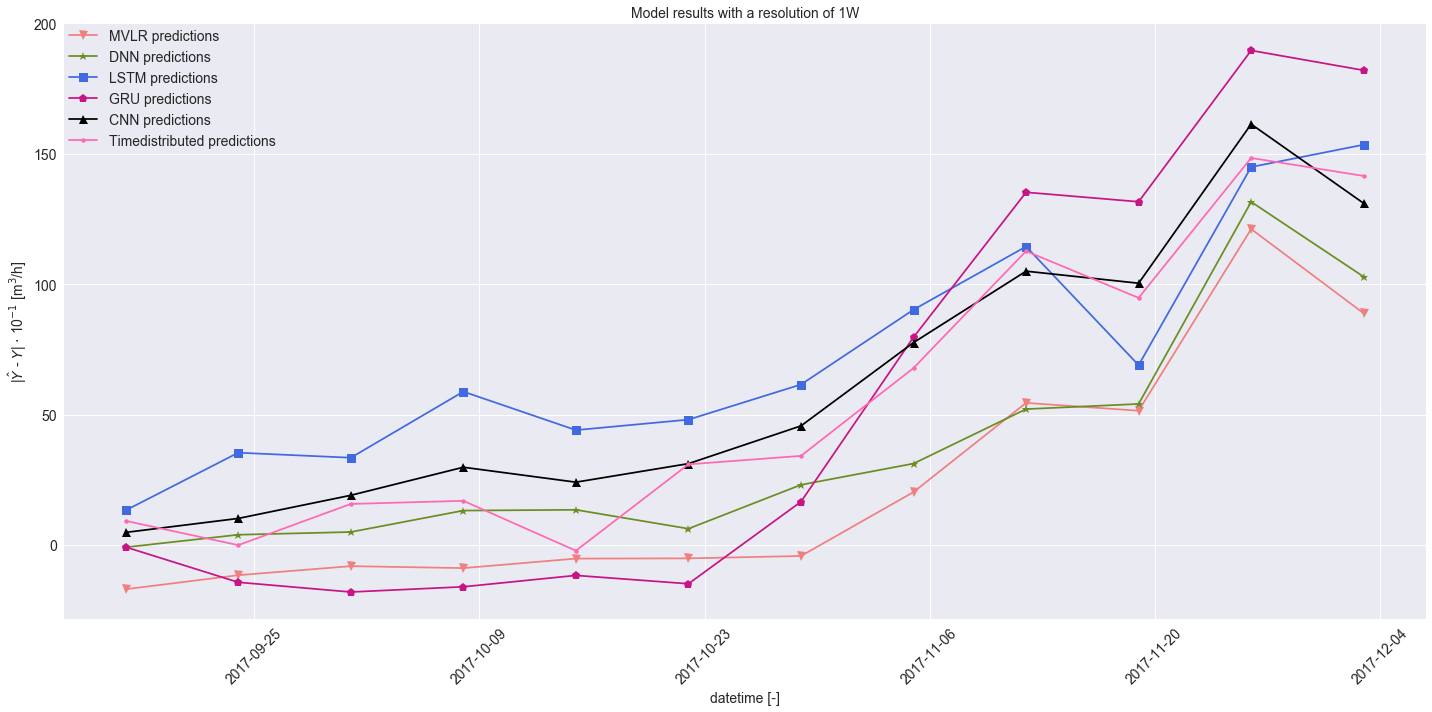

In [13]:
plot_predictions_difference(df, '1W', savefig=False)

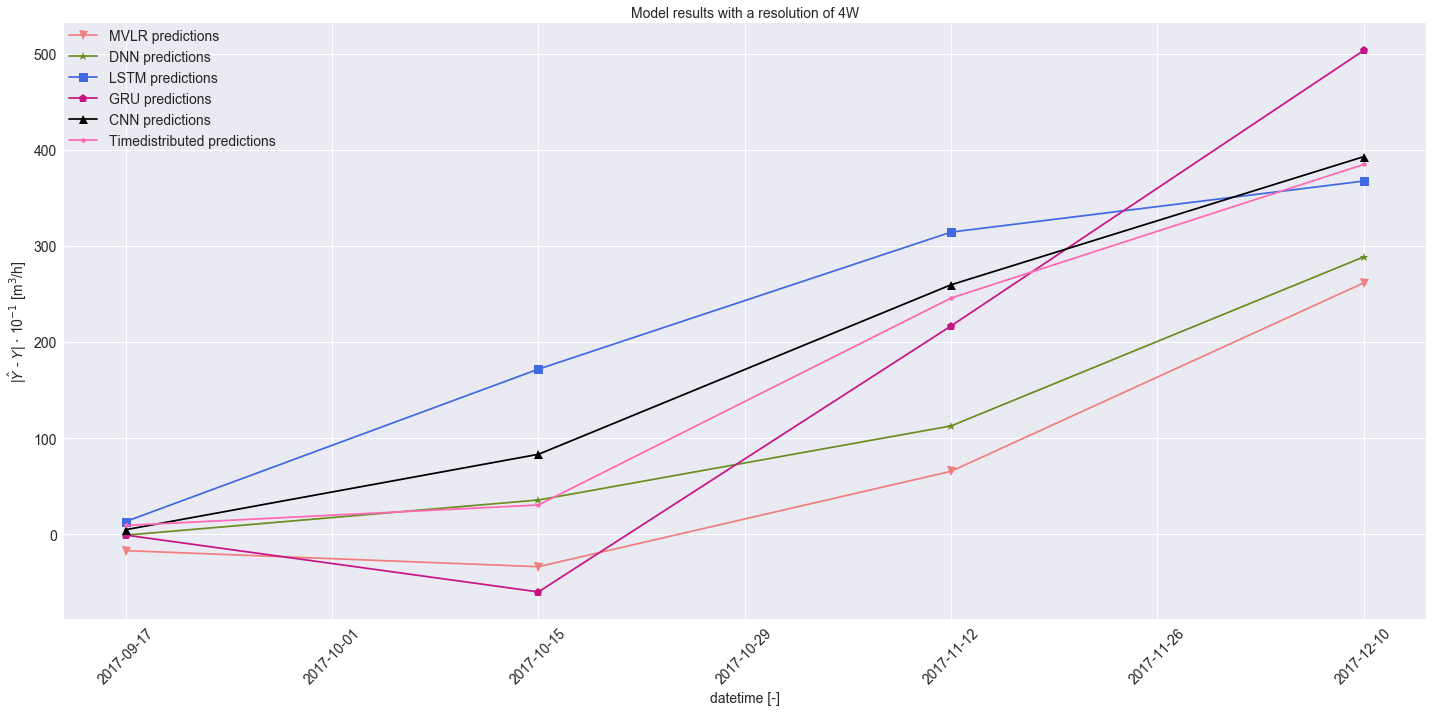

In [14]:
plot_predictions_difference(df, '4W', savefig=False)